# Add_feature all
* 추가로 만든(각각 magnitude에서 마이너스한) 변수들 모두 넣어서 진행
* category_features 사용위해 lgb.train사용
* 제출결과 : 34.1706082219(에러수정전)/에러수정후 : 0.3998665405

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import lightgbm as lgb

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# #colab용
# import os
# os.chdir('/content/drive/My Drive/Colab Notebooks/Dacon/천체관측/')

In [10]:
# path = "/content/drive/My Drive/Colab Notebooks/Dacon/천체관측/data/" #colab
path = "./data/" #local
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

### outlair

In [13]:
train_df.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


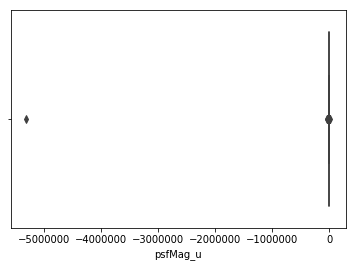

In [14]:
sns.boxplot(train_df.psfMag_u)

In [77]:
#minmax는 안됨
from sklearn.preprocessing import MinMaxScaler

In [65]:
mm = MinMaxScaler(copy = True)
mm.fit(train_df[['psfMag_g','psfMag_u']])
tt = mm.transform(train_df[['psfMag_g','psfMag_u']])
check = train_df[['psfMag_g','psfMag_u']]
checked = pd.concat([check,pd.DataFrame(tt)],axis = 1)

In [32]:
train_df.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,18358.921741,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


In [33]:
up_idx_t=()
dw_idx_t=()
train_light = train_df.iloc[:,2:]
for i in range(len(train_light.columns)):
    col = train_light.columns[i]
    up_idx_t+=tuple(train_df[train_df[col]>30].index)
    dw_idx_t+=tuple(train_df[train_df[col]<10].index)
del_idx = set(up_idx_t+dw_idx_t)
train_df[~train_df.index.isin(del_idx)].describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000,198601.000000
mean,360.952825,20.968183,19.848321,19.277797,18.865626,18.606426,21.160153,20.081327,19.500008,19.084099,18.826069,20.676088,19.586230,19.001980,18.599272,18.385847,20.714926,19.520125,18.933491,18.516930,18.272358
std,225.379447,2.061931,1.846890,1.695525,1.618266,1.674853,1.954359,1.832657,1.702275,1.625260,1.675230,2.237182,2.010351,1.895113,1.842769,1.974690,2.170467,1.949365,1.854497,1.792681,1.858317
min,1.000000,11.065800,13.358860,12.216175,10.726364,10.237786,10.136992,12.257588,11.795394,10.646672,10.473861,10.183594,10.486867,11.444553,10.080911,10.059957,12.292839,12.498143,11.802798,11.337467,10.977328
25%,174.000000,19.644189,18.692205,18.042678,17.740558,17.419498,19.934717,18.897315,18.255219,17.899916,17.602141,19.245635,18.110516,17.478374,17.048899,16.802546,19.260030,18.069520,17.419389,16.974653,16.701485
50%,349.000000,20.858304,19.894284,19.447293,19.036649,18.603323,21.039239,20.061035,19.626778,19.185639,18.706230,20.359395,19.575814,19.179041,18.692091,18.170271,20.395794,19.535840,19.137757,18.638944,18.097329
75%,527.000000,22.134749,21.129924,20.506209,20.069403,19.881533,22.320206,21.371848,20.770383,20.331582,20.134796,21.776235,20.990677,20.452741,20.017168,19.805277,21.968657,20.949031,20.403609,19.967457,19.818655
max,1000.000000,29.904253,29.719821,29.716721,29.674376,29.797875,29.653884,28.778564,28.681562,26.656056,28.876802,29.998184,29.995527,29.869520,29.983775,29.997649,29.798838,29.572553,29.028608,29.553684,28.128444


In [47]:
test_df[test_df.psfMag_r< -10]

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,


In [92]:
train_df.type.value_counts()

QSO                    49680
GALAXY                 37347
SERENDIPITY_BLUE       21760
SPECTROPHOTO_STD       14630
REDDEN_STD             14618
STAR_RED_DWARF         13750
STAR_BHB               13500
SERENDIPITY_FIRST       7132
ROSAT_D                 6580
STAR_CATY_VAR           6506
SERENDIPITY_DISTANT     4654
STAR_CARBON             3257
SERENDIPITY_RED         2562
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

In [15]:
train_df[train_df.psfMag_u< -100]

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,,
3991,SERENDIPITY_RED,186,-1.710151e+04,-40022.466071,-13825.727456,-26566.310827,-4513.034175,-1.805492e+04,-12425.104178,2855.324531,-257.341833,-7475.636880,-16796.597911,-19228.003222,7003.136546,1564.323175,-12979.648116,1165.845257,2057.444989,-36439.638493,-6350.733496,-16242.059439
26683,SERENDIPITY_BLUE,556,-3.101170e+04,-1612.930079,-18490.089587,2365.346400,-12328.176087,-1.235485e+02,-5884.679758,-11037.895279,-3823.461146,-16054.451287,-17528.793995,-16928.616668,-2158.098884,2859.585989,-30070.729379,-5231.175841,1316.120670,-6088.717528,-13187.594059,-26050.710196
37735,GALAXY,162,-9.682156e+03,-19866.754771,18.727960,18.419009,-278.918922,-2.607040e+04,-9004.608857,18.535186,18.251018,-127.209736,-9302.469061,-19060.074306,17.168938,16.853331,16.502096,-5889.713640,-27500.979134,16.860190,16.554300,-6367.050387
46441,ROSAT_D,438,-1.549716e+04,-11676.833264,-6690.928522,-17300.262551,-16881.589252,-1.637564e+04,-16758.193014,12084.735440,-2388.274225,12830.464621,2788.226302,-17790.951802,-9182.986733,-23158.107499,-13401.900862,127.619588,-19834.042913,594.019938,1671.664262,-10315.063634
46896,GALAXY,223,-1.582561e+04,-12948.152840,-6851.105514,4835.218639,-16712.296185,-1.561192e+04,-1439.665813,-5747.839612,-8427.423726,-6861.943051,-11801.732784,2390.657319,-2337.614557,-26276.971747,2398.072642,14488.251976,-6310.684269,-8633.128229,-8393.759288,7420.534172
74089,STAR_BHB,227,-3.188748e+04,-3821.287380,2789.987259,-7593.883765,-10466.868217,-1.501157e+04,-7746.508184,715.490900,-834.038111,-22882.579001,-20041.285652,12139.815877,-7586.040797,-9980.112689,-9103.923869,-580.522672,6327.875793,-10234.061250,420.211169,-12522.702972
76167,STAR_BHB,375,-1.541715e+04,-3726.835028,3048.110913,-13737.920783,-19629.604688,9.249859e+02,-9088.885818,-8448.758186,-15339.545421,-13351.800143,-1969.458492,-24123.028498,-21138.412757,-11930.837061,-9523.195324,-15873.535321,-26676.298945,-9721.443497,-16866.970233,-10404.510831
76863,GALAXY,70,-1.751139e+02,23.977133,20.649286,18.768535,22.291986,1.132277e+01,20.721059,19.230980,18.240866,18.224193,-4.422570,23.385174,21.303875,17.656738,29.829061,23.694507,25.440521,20.945292,18.601244,23.360258
79028,GALAXY,116,-5.015291e+02,23.334083,24.574719,14.025295,22.975050,-6.879888e+01,26.277483,9.801960,21.743010,20.452965,320.078866,51.569734,-15.132183,25.847271,22.043721,24.137922,22.962800,21.201616,20.237810,22.346913


In [95]:
train_df[train_df.type == "QSO"].sort_values("psfMag_u")

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,...,fiberMag_MAX,fiberMag_u-g,fiberMag_g-r,fiberMag_r-i,fiberMag_i-z,petroMag_MAX,petroMag_u-g,petroMag_g-r,petroMag_r-i,petroMag_i-z,modelMag_MAX,modelMag_u-g,modelMag_g-r,modelMag_r-i,modelMag_i-z
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
139197,QSO,94,-5.310802e+06,21.535095,21.146686,21.165407,21.019265,-1.864766e+06,21.754868,21.673284,21.827377,21.355714,298771.019041,21.537081,20.943557,...,i,-1.864788e+06,0.081584,-0.154093,0.471663,u,298749.481960,0.593524,-0.805349,-4.422133,u,6.850482,0.251552,-0.056676,0.094220
172746,QSO,528,-1.777826e+02,25.681952,23.330248,17.296652,23.775514,1.121682e+02,20.031775,18.398026,18.757188,18.349600,123.362885,25.408386,23.869155,...,u,9.213638e+01,1.633749,-0.359162,0.407587,u,97.954498,1.539232,9.030319,-8.419679,r,-4.198860,-0.523570,9.317639,-4.754963
158969,QSO,595,-1.297873e+01,21.060411,20.024819,19.843761,19.889665,2.644194e+01,21.213506,20.319091,19.809275,19.419442,24.157779,21.161204,20.089072,...,u,5.228438e+00,0.894415,0.509816,0.389834,u,2.996575,1.072132,0.581042,-1.968012,u,1.492712,0.969262,0.266651,-0.456907
53049,QSO,569,-6.565773e+00,22.258866,24.699832,21.446795,17.408301,1.619255e+01,24.596065,21.312118,19.454376,22.143884,74.906594,66.765230,24.654123,...,g,-8.403518e+00,3.283948,1.857742,-2.689508,u,8.141364,42.111107,1.463651,-15.767857,u,0.425456,-0.376534,1.254071,2.607508
67824,QSO,157,3.419618e+00,24.558082,23.444452,23.928310,21.441131,1.491877e+01,20.883080,19.906464,18.869670,16.476745,19.016808,26.175405,31.629578,...,g,-5.964314e+00,0.976615,1.036794,2.392925,r,-7.158597,-5.454173,5.084639,16.419234,i,-6.662206,1.488408,-4.418592,10.366265
93544,QSO,572,7.900287e+00,20.446470,20.139360,20.029173,20.239815,2.264834e+01,20.816653,20.496703,20.294422,20.012530,21.506101,20.342057,19.936559,...,u,1.831682e+00,0.319950,0.202281,0.281892,z,1.164044,0.405498,-0.110108,-8.141758,u,1.923992,0.319449,0.034395,-0.123480
186862,QSO,34,9.275713e+00,22.237821,22.137860,22.315405,20.924280,2.481809e+01,22.945879,22.588751,22.428389,22.550759,25.804107,22.236356,22.398992,...,u,1.872213e+00,0.357127,0.160362,-0.122370,u,3.567751,-0.162636,-1.593313,2.918548,u,1.942975,0.293247,-0.337898,1.587517
76936,QSO,540,1.106580e+01,21.736584,20.813928,20.510439,20.216279,2.473217e+01,22.205755,21.232308,20.842095,20.614802,26.281516,21.876391,21.066384,...,u,2.526413e+00,0.973447,0.390213,0.227293,u,4.405125,0.810008,0.489452,0.886660,u,1.740196,0.928458,0.308969,0.479291
148016,QSO,862,1.151214e+01,22.370554,21.655526,21.411977,21.103168,2.526575e+01,22.819391,22.102755,21.587386,22.103230,26.910859,22.137801,21.965149,...,u,2.446359e+00,0.716636,0.515369,-0.515843,u,4.773058,0.172652,0.861569,0.807111,u,1.385871,0.697705,0.247012,-0.061318


## DATA Setting

In [48]:
column_number = {}
number_columns = {}
for i, column in enumerate(sample_submission_df.columns):
    column_number[column] = i
    number_columns[i] = column
    
    
def to_number(x, dic):
    return dic[x]

train_df['type_num'] = train_df['type'].apply(lambda x: to_number(x, column_number))


In [49]:
def add_minus_feature_all(data,test = False):
    '''
    combination으로 모든 변수들의 조합에 대해서 컬럼생성 
    각 mag에서 가장 높은값의 filter를 받아오는 "~~mag_MAX"생성
    결과 64개로 증가
    '''
    from itertools import combinations
    n = 0
    for count in range(5,21,5):
        s = 2
        if test == True :
            s = 1
        selected = data.columns[s:].values[n:count]
        mag = str.split(selected[0],'_')[0]
#         data[mag+"_MAX"] = data[selected].apply(lambda x : str.split(np.argmax(x),'_')[1],axis = 1)
        for combi in list(combinations(selected,2)):
            name_1st = str.split(combi[0],'_')[1]
            name_2nd = str.split(combi[1],'_')[1]
            data[mag+"_"+name_1st+"-"+name_2nd] = data[combi[0]]-data[combi[1]]
        n=count
    return data

In [50]:
def add_minus_feature(data,test = False):
    '''
    근접변수에 대해서만 컬럼생성 ex) 'fiberMag_u-g', 'fiberMag_g-r', 'fiberMag_r-i', 'fiberMag_i-z'
    각 mag에서 가장 높은값의 filter를 받아오는 "~~mag_MAX"생성
    결과 38개로 증가 
    '''
    from itertools import combinations
    n = 0
    m = 0
    for count in range(5,21,5):
        s = 2
        if test == True :
            s = 1
        selected = data.columns[s:].values[n:count]
        mag = str.split(selected[0],'_')[0]
        data[mag+"_MAX"] = data[selected].apply(lambda x : str.split(np.argmax(x),'_')[1],axis = 1)
        for i in range(0,len(selected)):        
            if i>0: 
                name_1st = str.split(m,'_')[1]
                name_2nd = str.split(selected[i],'_')[1]
                data[mag+"_"+name_1st+"-"+name_2nd] = data[m]-data[selected[i]]
            m = selected[i]    
        n=count
    return data

In [51]:
train_df = add_minus_feature(train_df)
test_df = add_minus_feature(test_df,True)

C:\Users\starl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


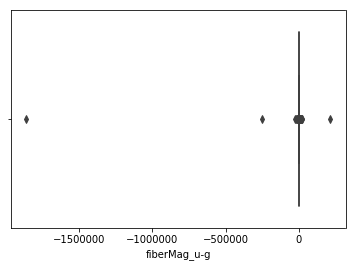

In [54]:
sns.boxplot(train_df['fiberMag_u-g'])

In [57]:
train_df['fiberMag_u-g'].sort_values()

id
139197   -1.864788e+06
77634    -2.480569e+05
154235   -2.532115e+04
37735    -1.706580e+04
46896    -1.417226e+04
67227    -9.900209e+03
101377   -7.355867e+03
74089    -7.265066e+03
3991     -5.629815e+03
79028    -9.507636e+01
12441    -7.830736e+01
64659    -6.849128e+01
92874    -6.190574e+01
20701    -5.871739e+01
60866    -5.435029e+01
68611    -3.559080e+01
183341   -3.368276e+01
171266   -3.299964e+01
155095   -2.759025e+01
1274     -2.354169e+01
126150   -2.034118e+01
49412    -2.004935e+01
124178   -1.986276e+01
26186    -1.959066e+01
182981   -1.618982e+01
161951   -1.609610e+01
8112     -1.558506e+01
87625    -1.477671e+01
39659    -1.408053e+01
78500    -1.390801e+01
              ...     
162936    2.414861e+01
73337     2.489553e+01
192452    2.587901e+01
196688    2.712000e+01
124103    2.920603e+01
172595    3.221646e+01
4570      3.305871e+01
151644    4.614861e+01
22364     5.369268e+01
188900    7.337628e+01
125825    7.355459e+01
122919    7.441552e+01
107592  

In [8]:
train_X = train_df.drop(columns=['type', 'type_num'], axis=1)
train_y = train_df['type_num']
test_X = test_df

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=42,stratify = train_y)

In [10]:
train_ds = lgb.Dataset(X_train, label = y_train, categorical_feature=['fiberID'])
test_ds = lgb.Dataset(X_test, label = y_test, categorical_feature=['fiberID']) 

In [11]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': train_y.nunique(),
    'metric': {'multi_logloss','multi_logloss'},
    'num_leaves': 25,
    'learning_rate': 0.005,
    'max_depth' : 12,
    'random_state' : 42
}

## Modeling

In [12]:
evaluation_results = {}
lgmb_model = lgb.train(params, train_ds,num_boost_round= 20000, 
                       valid_sets = [train_ds,test_ds], valid_names=['Train', 'Test'],
                       evals_result=evaluation_results,
                       verbose_eval=100, early_stopping_rounds=100)

C:\Users\starl\Anaconda3\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 100 rounds
[100]	Train's multi_logloss: 1.2872	Test's multi_logloss: 1.30877
[200]	Train's multi_logloss: 0.902364	Test's multi_logloss: 0.936763
[300]	Train's multi_logloss: 0.686358	Test's multi_logloss: 0.733247
[400]	Train's multi_logloss: 0.553236	Test's multi_logloss: 0.611216
[500]	Train's multi_logloss: 0.466339	Test's multi_logloss: 0.535589
[600]	Train's multi_logloss: 0.408258	Test's multi_logloss: 0.488171
[700]	Train's multi_logloss: 0.367349	Test's multi_logloss: 0.457182
[800]	Train's multi_logloss: 0.336663	Test's multi_logloss: 0.436689
[900]	Train's multi_logloss: 0.313128	Test's multi_logloss: 0.423667
[1000]	Train's multi_logloss: 0.293778	Test's multi_logloss: 0.414803
[1100]	Train's multi_logloss: 0.277765	Test's multi_logloss: 0.408891
[1200]	Train's multi_logloss: 0.264403	Test's multi_logloss: 0.404987
[1300]	Train's multi_logloss: 0.252648	Test's multi_logloss: 0.402499
[1400]	Train's multi_logloss: 0.242076	T

In [ ]:
clf.best_iteration

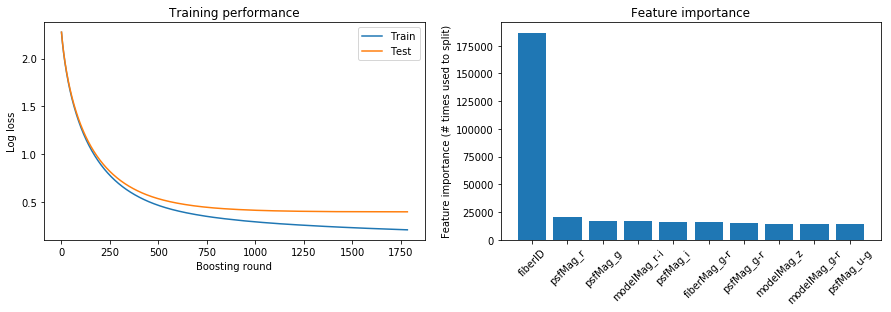

In [20]:
fig, axs = plt.subplots(1, 2, figsize=[15, 4])

# Plot the log loss during training
axs[0].plot(evaluation_results['Train']['multi_logloss'], label='Train')
axs[0].plot(evaluation_results['Test']['multi_logloss'], label='Test')
axs[0].set_ylabel('Log loss')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': lgmb_model.feature_name(), 
                            'importance': lgmb_model.feature_importance()}).sort_values('importance', ascending=False).head(10)
axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (# times used to split)')
axs[1].set_title('Feature importance')
plt.xticks(rotation=45)

plt.show()

In [21]:
train_y_pred = lgmb_model.predict(X_test)
real_y_pred = lgmb_model.predict(test_X)

In [22]:
train_y_pred.shape

(59998, 19)

In [23]:
#log_loss
log_loss(y_test,train_y_pred,labels= list(set(y_test)))

0.39861183678248857

In [24]:
lgmb_model.feature_importance()

array([186778,   8697,  16770,  20425,  15993,  12211,   8608,  10731,
        13227,  12700,   7681,   8745,   8087,   9445,   9852,   9080,
         9207,  10427,   8986,   9159,  14486,  14175,   8607,   5429,
         4333,  14790,   8312,   5035,  11608,   6832,  11059,  12007,
         7387,   4663,   5461,  15845,   8575,   5776,  11372,  10746,
        12767,  13175,   6717,   5185,   4069,  11328,   5556,   4893,
        10176,   5899,   8195,  14014,   8022,   5185,   4168,  14333,
         8436,   4911,  16593,   8863,  12108])

### feature_importance

In [25]:
pi_df = pd.DataFrame(lgmb_model.feature_importance(), index= train_X.columns,columns= ['importance']).sort_values('importance',ascending = False)
pi_df.head(10)

,importance
fiberID,186778
psfMag_r,20425
psfMag_g,16770
modelMag_r-i,16593
psfMag_i,15993
fiberMag_g-r,15845
psfMag_g-r,14790
modelMag_z,14486
modelMag_g-r,14333
psfMag_u-g,14175


### 예측결과에 대해
* 12번이 모두 6번으로 몰림
중간예측 : 0,2,7,11
망한예측 : 12,17

In [26]:
cm_result = pd.DataFrame(confusion_matrix(y_test,np.argmax(train_y_pred,axis = 1)))

In [27]:
cm_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,233,0,0,0,17,57,5,171,58,0,0,18,0,1,17,10,0,0,61
1,1,1880,0,0,0,0,1,3,13,0,3,4,0,0,0,0,6,0,41
2,0,0,68,73,0,0,0,0,0,1,8,0,0,0,0,0,0,0,0
3,0,0,32,650,0,0,1,0,0,1,85,0,0,0,0,0,0,0,0
4,1,0,0,0,4251,25,1,0,9,0,0,11,0,0,0,88,0,0,0
5,27,0,1,0,150,3632,2,71,62,0,0,3,0,0,0,86,0,0,16
6,3,23,0,0,12,1,10903,5,88,1,0,53,0,81,20,14,0,0,0
7,146,0,0,0,0,195,1,683,21,0,0,3,0,0,0,1,0,0,346
8,8,10,0,8,34,236,126,36,13080,0,12,249,0,72,75,9,15,0,934
9,0,0,0,0,0,0,0,0,8,30,0,0,0,0,0,0,0,0,0


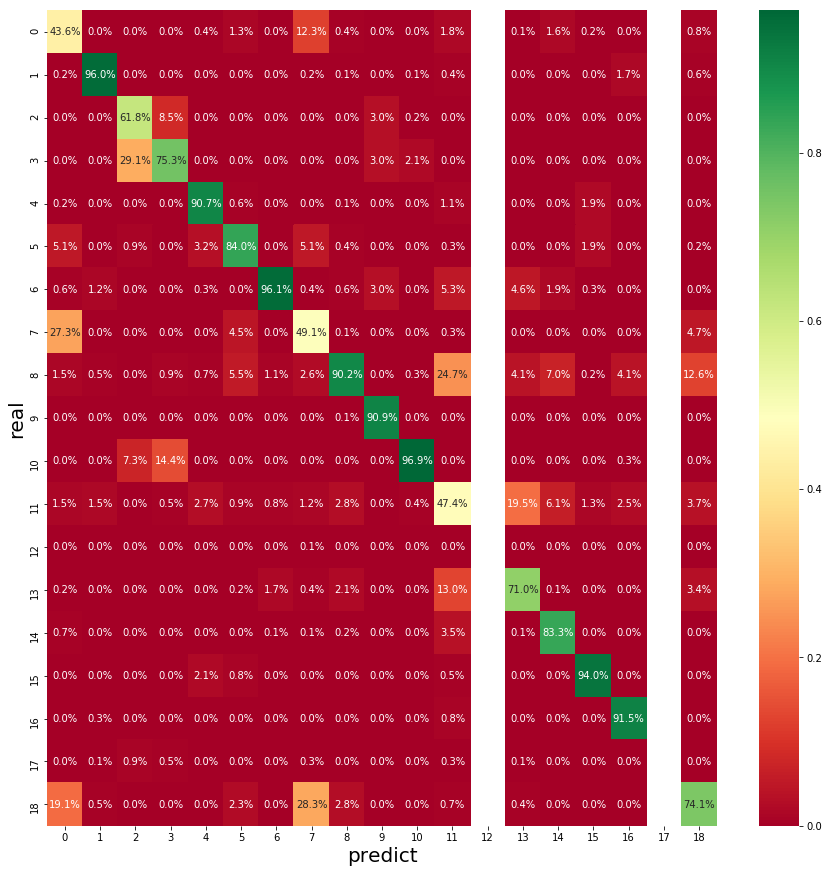

In [28]:
plt.figure(figsize =(15,15))
sns.heatmap(cm_result/np.sum(cm_result),annot = True, cmap ='RdYlGn',fmt='.1%')
plt.ylabel("real",fontsize=20)
plt.xlabel("predict",fontsize=20)
plt.show()

# REAL

In [29]:
train_ds = lgb.Dataset(train_X, label = train_y, categorical_feature=['fiberID'])

In [30]:
lgmb_model = lgb.train(params, train_ds,num_boost_round= 2000, verbose_eval=100)

C:\Users\starl\Anaconda3\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [31]:
y_pred = lgmb_model.predict(test_X)

In [32]:
y_pred

array([[3.28063156e-05, 8.35008722e-05, 5.94463590e-05, ...,
        2.87269450e-05, 6.54995818e-06, 2.70487475e-04],
       [2.00635102e-04, 3.96448496e-04, 2.79048360e-05, ...,
        6.20603394e-05, 5.82925295e-06, 1.39628659e-03],
       [8.38614033e-05, 3.31639351e-05, 1.87845398e-06, ...,
        4.16007667e-06, 3.92813637e-07, 9.39930305e-05],
       ...,
       [2.02831320e-04, 4.07818989e-04, 2.04074743e-05, ...,
        4.51949628e-05, 4.26767467e-06, 7.99281875e-02],
       [4.57876031e-06, 8.50060006e-06, 5.59158285e-07, ...,
        1.23832756e-06, 1.16922842e-07, 2.85951657e-04],
       [4.71020679e-04, 7.71596912e-06, 5.27732530e-07, ...,
        1.16873121e-06, 1.10343543e-07, 7.14463332e-05]])

In [33]:
real_y_pred

array([[4.75327456e-05, 1.33148051e-04, 8.23810107e-05, ...,
        2.15369185e-05, 2.39626013e-06, 4.53485907e-04],
       [3.30795991e-04, 7.44575083e-04, 5.22072366e-05, ...,
        1.19600211e-04, 7.87485208e-06, 2.48050541e-03],
       [1.32824348e-04, 4.89583031e-05, 3.25847243e-06, ...,
        7.44564653e-06, 4.93409353e-07, 1.54940307e-04],
       ...,
       [3.26876354e-04, 6.18658692e-04, 4.16342394e-05, ...,
        9.50600661e-05, 6.29857296e-06, 9.52795469e-02],
       [1.11577777e-05, 2.71457546e-05, 1.77770870e-06, ...,
        4.05889741e-06, 2.68937973e-07, 5.56443066e-04],
       [4.96349413e-04, 2.32149873e-05, 1.63934661e-06, ...,
        3.74298652e-06, 2.48045422e-07, 1.15247077e-04]])

In [34]:
submission = pd.DataFrame(data=y_pred, columns=sample_submission_df.columns, index=sample_submission_df.index)
submission.to_csv('./submisson/submission.csv', index=True)

In [35]:
#제출변경
submission = pd.DataFrame(data=real_y_pred, columns=sample_submission_df.columns, index=sample_submission_df.index)
submission.to_csv('submission.csv', index=True)